# Lab 07 - Measuring $B(r)$ and Magnetic Dipole Moment

The goal of this lab is to:

1. determine $(B)$ as a function of distance $(r)$ along the axis of a magnet and determine whether the magnet can be modeled as a magnetic dipole.
2. measure the magnetic dipole moment of a magnet.
3. determine $(B)$ as a function of distance $(r)$ along the axis of a coil and determine whether the coil can be modeled as a magnetic dipole.
4. measure the magnetic dipole moment of a coil.

## Import Packages

We will run code in this Jupyter notebook. The code requires the Python packages below. Run the cell below by clicking the *Run* icon or by typing shift-ENTER (or shift-return) on the keyboard.

In [3]:
#import packages used in the lesson
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from io import StringIO #used to convert string to a dataframe

## Introduction

A magnetic dipole *by definition* creates a magnetic field on the axis of the dipole that has a magnitude

$$B = \frac{\mu_0}{4\pi} \frac{2\mu}{r^3}$$

where $r$ is the distance from the dipole, and $\mu$ is the magnetic dipole moment.

For a current loop of radius $R$ and area $A=\pi R^2$, the magnetic field due to the loop at a distance $r$ on the axis is the same as a magnetic dipole if $r>>R$. Then,

$$B \approx \frac{\mu_0}{4\pi} \frac{2\mu}{r^3}\ , \quad \mu = IA \qquad\ \mbox{for}\ r\gg R$$

## Apparatus

### Magnetic Field Sensor

We will use a magnetic field sensor that measures $B$ along the axis of the sensor (only).

Examine the sensor now. Set the sensivity switch on its most sensitive setting (approximately 0.3 mT). The sensor also shows an arrow pointing away from the sensor that shows the default positive direction of the reading. If the magnetic field points *away* from the sensor, the reading is positive. If the magnetic field points *toward* the sensor, the reading is negative.

1. Connect the sensor to the LabQuest data acquisition (DAQ) device.
2. Open the *Logger Pro* software. By default, it will detect the magnetic field sensor and show its instantaneous reading.


## Magnet - 4 neodymium magnets

We will use an aluminum track (which does not interact with magnetic fields, unlike iron, nickel, and other materials) to align the magnetic field sensor and magnet and precisely measure distance between them.

Set the sensor on the groove of the track and set the magnet (composed of 4 smaller neodymium magnets) on a small platform that will allow you to more precisely measure distance using the ruler on the track, as shown below.

![](sensor-magnet.png)

In Logger Pro, go to the menu **Experiment$\to$Zero** or click the *0* icon in the toolbar to zero the sensor. **Do not move the sensor after it is zeroed.**


Measure the magnetic field due to the magnet for various distances from the magnet. **You must measure distance from the surface of the sensor to the center of the magnet.**

**Choose a reasonable range to collect data.** This might be approximately from 4 cm to 10 cm; however, it depends on the strength of the magnet. As the experimentalist, you should choose the appropriate range. You should have approximately 10 data points in the range, perhaps with measurements every 0.5 cm. Record your data on paper.

## Data Analysis

Type our data in the cell below, separated by commas (no spaces). The data shown here is merely an example. You should replace it.

Run the code in the cell by typing shift-ENTER (or shift-return) on your keyboard. Or, click the *Run* icon. Do this for each code cell in the notebook.

In [22]:
data = StringIO("""r (m),B (T)
0.04,1.062e-3
0.045,0.7376e-3
0.05,0.5405e-3
0.055,0.4431e-3
""") 

Plot B vs. r.

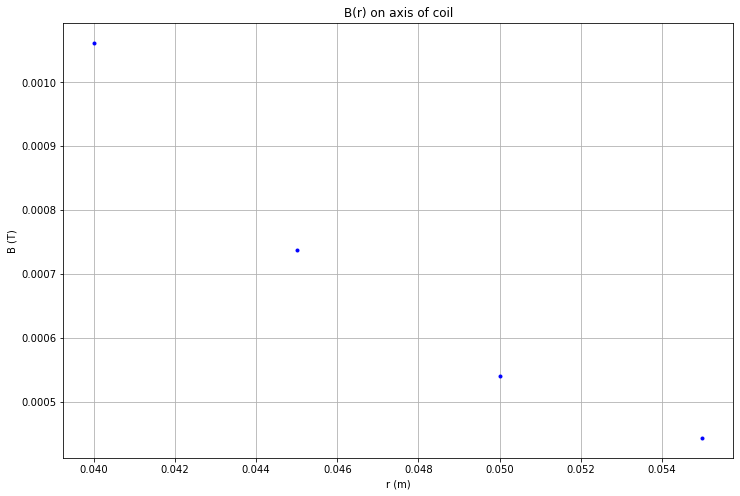

In [23]:
# read the data file
df = pd.read_csv(data, sep=',')
df.head()

# assign variable names to the columns of data; these variables are lists
r = df['r (m)']
B = df['B (T)']

# plot data
fig = plt.figure(figsize=(12,8))
plt.title("B(r) on axis of coil")
plt.plot(r, B, 'b.')
plt.xlabel('r (m)')
plt.ylabel('B (T)')
plt.grid()
plt.show()


To determine whether it fits a power law of the form $B=ar^n$, we plot $log(B)$ vs. $log(r)$. This is called a *log-log plot*. If it is linear, then the data fits a power law.

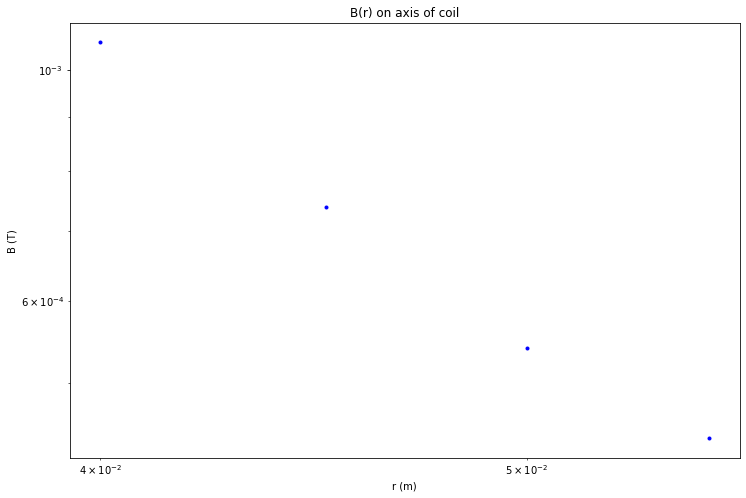

In [24]:
# log-log plot
fig = plt.figure(figsize=(12,8))
plt.title("B(r) on axis of coil")
plt.loglog(r, B, 'b.')
plt.xlabel('r (m)')
plt.ylabel('B (T)')
plt.show()


Fit a straight line to the data and get the slope and intercept. The exponent $n$ of the power law is the slope on the log-log plot.

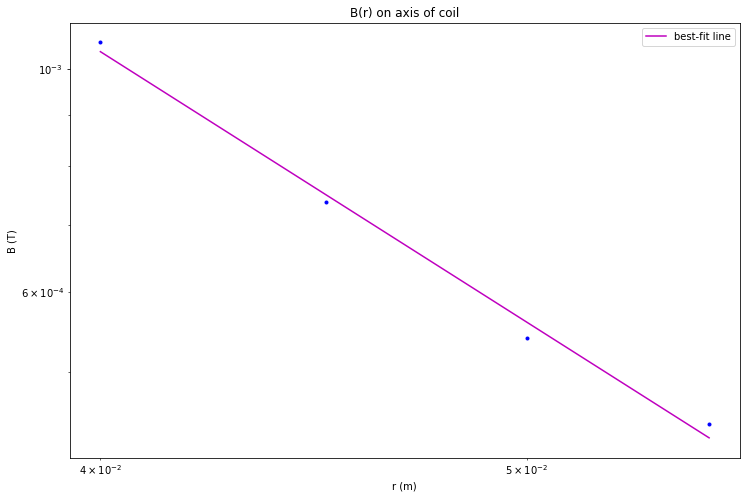

A linear fit to the log of the data gives: a = 1.371e-07, n = -2.78


In [26]:
linear = lambda x, m, b: m*x+b

params, stats = curve_fit(linear, np.log(r), np.log(B))
n = params[0]
La = params[1]
a = np.exp(La)

power = lambda x, a, n: a*x**n

rmodel = np.linspace(np.min(r), np.max(r), 100)
Bmodel = power(rmodel,a,n)

fig = plt.figure(figsize=(12,8))
plt.title("B(r) on axis of coil")
plt.loglog(r, B, 'b.')
plt.loglog(rmodel, Bmodel, 'm-', label="best-fit line")
plt.xlabel('r (m)')
plt.ylabel('B (T)')
plt.legend()
plt.show()

print("A linear fit to the log of the data gives: a = {:.3e}, n = {:.2f}".format(a,n))


Can the magnet be modeled as a dipole? If the plot is linear, only for large $r$, then delete rows of data for small $r$ and redo the analysis, only for large $r$.

To measure the magnetic dipole moment, we will *assume* the data fits $B =\frac{a}{r^3}$ and calculate the fit constant $a$. From this, we will calculate the magnetic dipole moment.

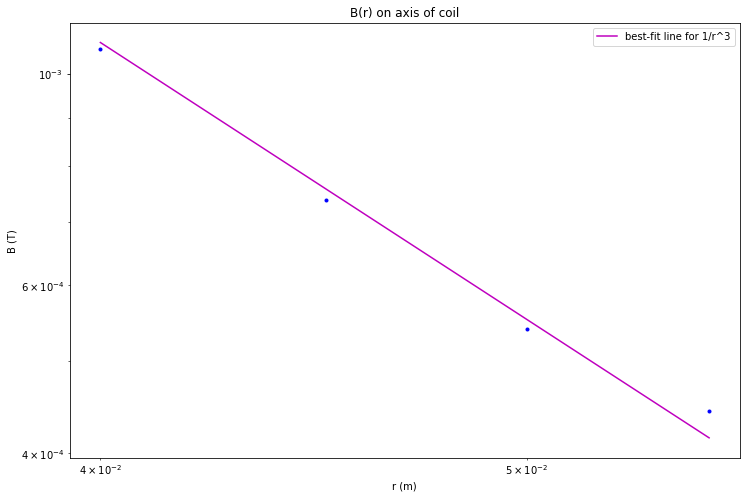

The fit parameter is a = 6.907e-08.
The magnetic dipole moment is 0.345 A m^2.


In [29]:
invcubed = lambda x, a: -3*x + a

params, stats = curve_fit(invcubed, np.log(r), np.log(B))
La = params[0]
a = np.exp(La)

rmodel = np.linspace(np.min(r), np.max(r), 100)
Bmodel = power(rmodel,a,-3)

fig = plt.figure(figsize=(12,8))
plt.title("B(r) on axis of coil")
plt.loglog(r, B, 'b.')
plt.loglog(rmodel, Bmodel, 'm-', label="best-fit line for 1/r^3")
plt.xlabel('r (m)')
plt.ylabel('B (T)')
plt.legend()
plt.show()

print("The fit parameter is a = {:.3e}.".format(a))
moofpi = 1e-7
mu = a/moofpi/2
print("The magnetic dipole moment is {:.3f} A m^2.".format(mu))


## Track and Coil

1. Set up the sensor and coil on the track as shown below. The sensor should be aligned with the axis of the coil. It helps to align the platform and coil with the edge of the track. Use a rubber band, if necessary, to hold the sensor on the platform. Otherwise, you will have to hold it as you make measurements.

  ![](sensor-coil.png)

2. In Logger Pro, go to the menu **Experiment$\to$Zero** or click the *0* icon in the toolbar to zero the sensor. **Do not move the sensor after it is zeroed.**

2. Connect the coil to the power supply. Set the power supply on 5.0 V.

3. Use the magnetic field sensor to determine the direction of the magnetic field due to current in the coil. Using the right hand rule (RHR), what is the direction that current flows around the coil? 

  Now examine the coil. Current flows in the direction of the electric field in the wire, toward lower electric potential. Is current flowing in the direction you predicted?
  
**Discuss your prediction and observation with the instructor.**

4. Now, if necessary, change the connections to the coil such that the magnetic field reading by the sensor is positive.

## Measure $B_{axis}$ for the coil

What is the (average) radius of the coil?

Measure the magnetic field at distances from the *middle* of the coil from approximately $4R$ to $8R$ (or whatever is best), along the axis of the coil. You should measure at least ten data points in the range you choose. Record your data for $r$ and $B$ in units of meters and teslas on paper. It is easiest to use 0.5 cm or 1 cm increments or something simple that also gives you numerous data points within this range.

## Data Analysis for Coil

Enter your data in the cell below, separated by commas. Replace the data shown here that is merely an example.

In [38]:
data = StringIO("""r (m),B (T)
0.08,0.078e-3
0.1,0.045e-3
0.12,0.026e-3
0.14,0.016e-3
0.16,0.013e-3
0.18,0.008e-3
""") 

Plot B vs. r.

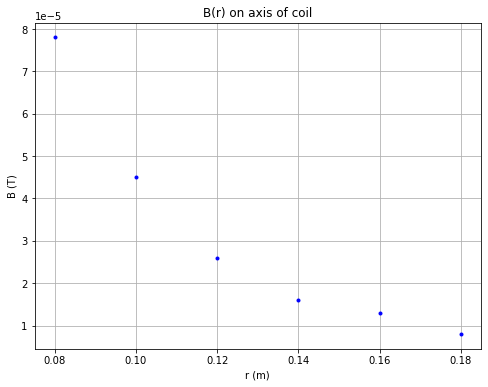

In [39]:
# read the data file
df = pd.read_csv(data, sep=',')
df.head()

# assign variable names to the columns of data; these variables are lists
r = df['r (m)']
B = df['B (T)']

# plot data
fig = plt.figure(figsize=(8,6))
plt.title("B(r) on axis of coil")
plt.plot(r, B, 'b.')
plt.xlabel('r (m)')
plt.ylabel('B (T)')
plt.grid()
plt.show()


To determine whether it fits a power law of the form $B=ar^n$, we plot $log(B)$ vs. $log(r)$. This is called a *log-log plot*. If it is linear, then the data fits a power law.

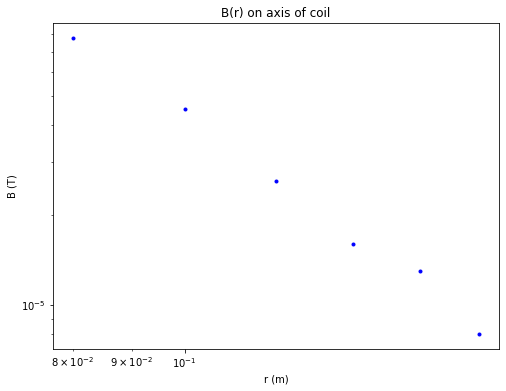

In [40]:
# log-log plot
fig = plt.figure(figsize=(8,6))
plt.title("B(r) on axis of coil")
plt.loglog(r, B, 'b.')
plt.xlabel('r (m)')
plt.ylabel('B (T)')
plt.show()


Fit a straight line to the data and get the slope and intercept. The exponent $n$ of the power law is the slope on the log-log plot.

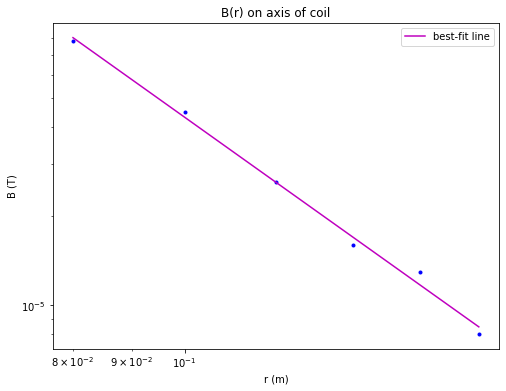

A linear fit to the log of the data gives: a = 7.325e-08, n = -2.77


In [41]:
linear = lambda x, m, b: m*x+b

params, stats = curve_fit(linear, np.log(r), np.log(B))
n = params[0]
La = params[1]
a = np.exp(La)

power = lambda x, a, n: a*x**n

rmodel = np.linspace(np.min(r), np.max(r), 100)
Bmodel = power(rmodel,a,n)

fig = plt.figure(figsize=(8,6))
plt.title("B(r) on axis of coil")
plt.loglog(r, B, 'b.')
plt.loglog(rmodel, Bmodel, 'm-', label="best-fit line")
plt.xlabel('r (m)')
plt.ylabel('B (T)')
plt.legend()
plt.show()

print("A linear fit to the log of the data gives: a = {:.3e}, n = {:.2f}".format(a,n))


Can the coil be modeled as a dipole?

If not, select the points farthest away from the coil, where the graph is closer to a straight line, by deleting the lines of data you will not use and re-running all of the previous code cells.

To measure the magnetic dipole moment, we will *assume* the data fits $B =\frac{a}{r^3}$ and calculate the fit constant $a$. From this, we will calculate the magnetic dipole moment.

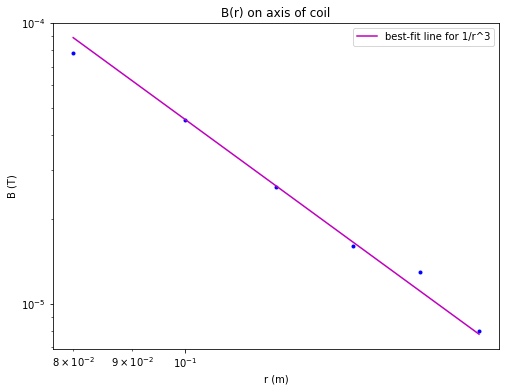

The fit parameter is a = 4.544e-08.
The magnetic dipole moment is 0.227 A m^2.


In [42]:
invcubed = lambda x, a: -3*x + a

params, stats = curve_fit(invcubed, np.log(r), np.log(B))
La = params[0]
a = np.exp(La)

rmodel = np.linspace(np.min(r), np.max(r), 100)
Bmodel = power(rmodel,a,-3)

fig = plt.figure(figsize=(8,6))
plt.title("B(r) on axis of coil")
plt.loglog(r, B, 'b.')
plt.loglog(rmodel, Bmodel, 'm-', label="best-fit line for 1/r^3")
plt.xlabel('r (m)')
plt.ylabel('B (T)')
plt.legend()
plt.show()

print("The fit parameter is a = {:.3e}.".format(a))
moofpi = 1e-7
mu = a/moofpi/2
print("The magnetic dipole moment is {:.3f} A m^2.".format(mu))


## Calculate the Number of Turns in the Coil

The magnetic dipole moment of a coil is 

$$\mu_{coil} = NI\pi R^2$$

The approximate current through the coil is shown on the power supply. Use your measured magnetic dipole moment and the current shown on the power supply to calculate $N$, the number of turns in the coil.